<a href="https://colab.research.google.com/github/rajeevak40/mnist_fashion_using_tensorflow/blob/main/Classification_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification problem 

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data, train_labels), (test_data, test_labels)=fashion_mnist.load_data()

In [ ]:
# Checking  shape,
print(f"Training sample:\n{train_data[0]}\n") 
print(f"Training label: {train_labels[0]}")
train_data[0].shape, train_labels[0].shape

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

((28, 28), ())

In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(train_data.dtype)
print(train_labels.dtype)

(60000, 28, 28)
(60000,)
uint8
uint8


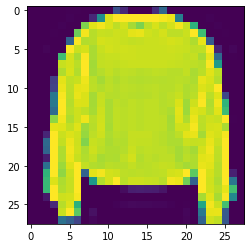

In [ ]:
plt.imshow(train_data[7])

In [ ]:
# Check on the lables
train_labels[7]

2

In [ ]:
# Creating lable list
class_names=["T-shirt/top", "Trouser","Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag"," Ankle boot"]
len(class_names)

10

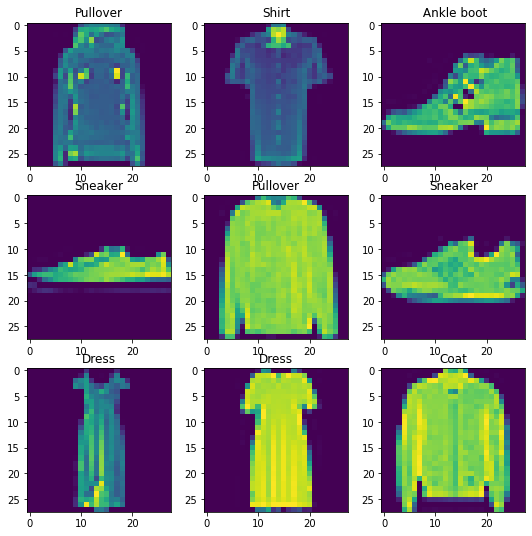

In [ ]:
# Check on  sample data and its lable
import random
plt.figure(figsize=(9,9))
for i in range(9):
  ax=plt.subplot(3,3, i+1)
  image_index= random.choice(range(len(train_data)))
  plt.imshow(train_data[image_index])
  plt.title (class_names[train_labels[image_index]])

# Model 1

In [ ]:
train_data_norm= train_data/225
test_data_norm= test_data/225


In [ ]:
# Model building.
tf.random.set_seed(42)
#model_01= tf.keras.Sequential( [tf.keras.layers.Flatten(input_shape=(28, 28))])
#model_01.add(tf.keras.layers.Dense(4, activation="relu"))
#model_01.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model_01 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])


# Model Compile
model_01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(), 
                 metrics=["accuracy"])

# Create Learning rate callback
lr_scheduler= tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3*10**(epochs/20))


# Model fit & Evaluation.
history= model_01.fit(train_data_norm,train_labels, epochs=10, verbose=0, validation_data=(test_data_norm, test_labels), callbacks=[lr_scheduler] )



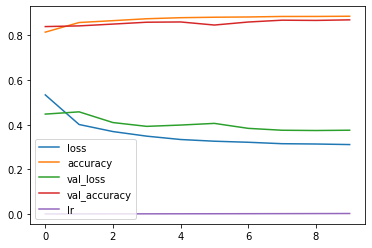

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
# Model building.
tf.random.set_seed(42)
#model_01= tf.keras.Sequential( [tf.keras.layers.Flatten(input_shape=(28, 28))])
#model_01.add(tf.keras.layers.Dense(4, activation="relu"))
#model_01.add(tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax))

model_01 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(50, activation="relu"),
  tf.keras.layers.Dense(20, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])


# Model Compile
model_01.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                 metrics=["accuracy"])

# Model fit & Evaluation.
history_final= model_01.fit(train_data_norm,train_labels, epochs=10, verbose=0, validation_data=(test_data_norm, test_labels))


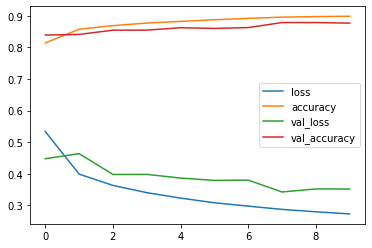

In [ ]:
pd.DataFrame(history_final.history).plot()

# Confusion Metrics

In [ ]:
from sklearn.metrics import confusion_matrix
test_pred= model_01.predict(test_data_norm).argmax(axis=1)
x=confusion_matrix(y_true= test_labels, y_pred=test_pred)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  """


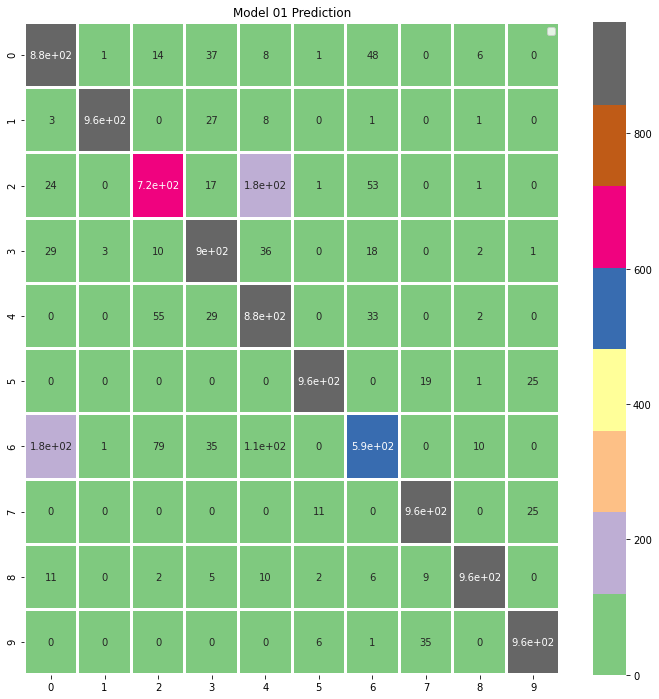

In [ ]:
import seaborn as sn
plt.figure(figsize=(12,12),facecolor='w')
plt.title("Model 01 Prediction")
plt.xticks(ticks= [0,1,2,3,4,5,6,7,8,9], labels=class_names)
plt.legend( [0,1,2,3,4,5,6,7,8,9], labels=class_names, loc='best')
plt.ylabel("True Label")
sn.heatmap(x,annot=True, linecolor='white', linewidth=2, cmap="Accent")